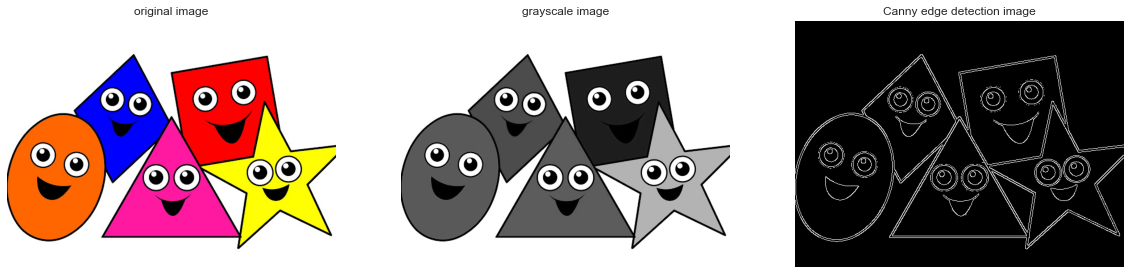

In [1]:
#a)canny Edge detection

import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

loaded_image=cv2.imread("shapes.jpeg")
loaded_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB)

gray_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2GRAY)

edged_image=cv2.Canny(gray_image, threshold1=30, threshold2=100)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(loaded_image,cmap="gray")
plt.title("original image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.title("grayscale image")
plt.subplot(1,3,3)
plt.imshow(edged_image,cmap="gray")
plt.axis("off")
plt.title("Canny edge detection image")
plt.show()

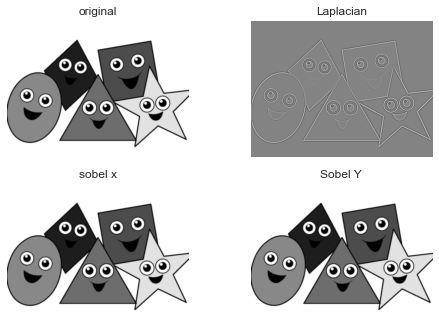

In [11]:
#laplacian and sobel edge detecting methods

import cv2
import numpy as np
from matplotlib import pyplot as plt

#loading image
img0=cv2.imread('shapes.jpeg',)

#converting to gray scale
gray=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

#remove noise
img=cv2.GaussianBlur(gray,(3,3),0)

#convolute  with proper kernels
laplacian=cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('original'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img,cmap='gray')
plt.title('sobel x'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])

plt.show()

In [18]:
#edge detection using prewitt operartor
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread('shapes.jpeg',)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian=cv2.GaussianBlur(gray,(3,3),0)

#prewitt
kernelx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely=np.array([[-1,0,-1],[-1,0,1],[-1,0,1]])
img_prewittx=cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty=cv2.filter2D(img_gaussian, -1, kernely)

cv2.imshow("original image",img)
cv2.imshow("prewitt x", img_prewittx)
cv2.imshow("prewitt y", img_prewitty)
cv2.imshow("prewitt", img_prewittx+img_prewitty)
cv2.waitKey()
cv2.destroyAllWindows()


In [19]:
#roberts edge detection-roberts cross operator
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
roberts_cross_v=np.array([[1,0],
                        [0,-1]])
roberts_cross_h=np.array([[0,1],
                        [-1,0]])
img=cv2.imread('shapes.jpeg',0).astype('float64')
img/=255.0
vertical=ndimage.convolve(img, roberts_cross_v )
horizontal=ndimage.convolve(img, roberts_cross_h )

edged_img=np.sqrt(np.square(horizontal)+np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)
cv2.imshow("OutputImage", edged_img)
cv2.waitKey()
cv2.destroyAllWindows()